## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max.columns', None)

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pip install matplotlib==3.3.0

In [6]:
house = pd.read_csv('https://bit.ly/2Ww3f6sPropertiesDs')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# check dataset shape
house.shape

(21613, 21)

In [8]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [9]:
house = house.drop(columns = ['id', 'date'])

In [10]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
house.shape

(21608, 19)

In [11]:
# check for missing data
house.isna().sum()


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in the dataset

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [12]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()
house_columns.remove('price')
len(house_columns)

18

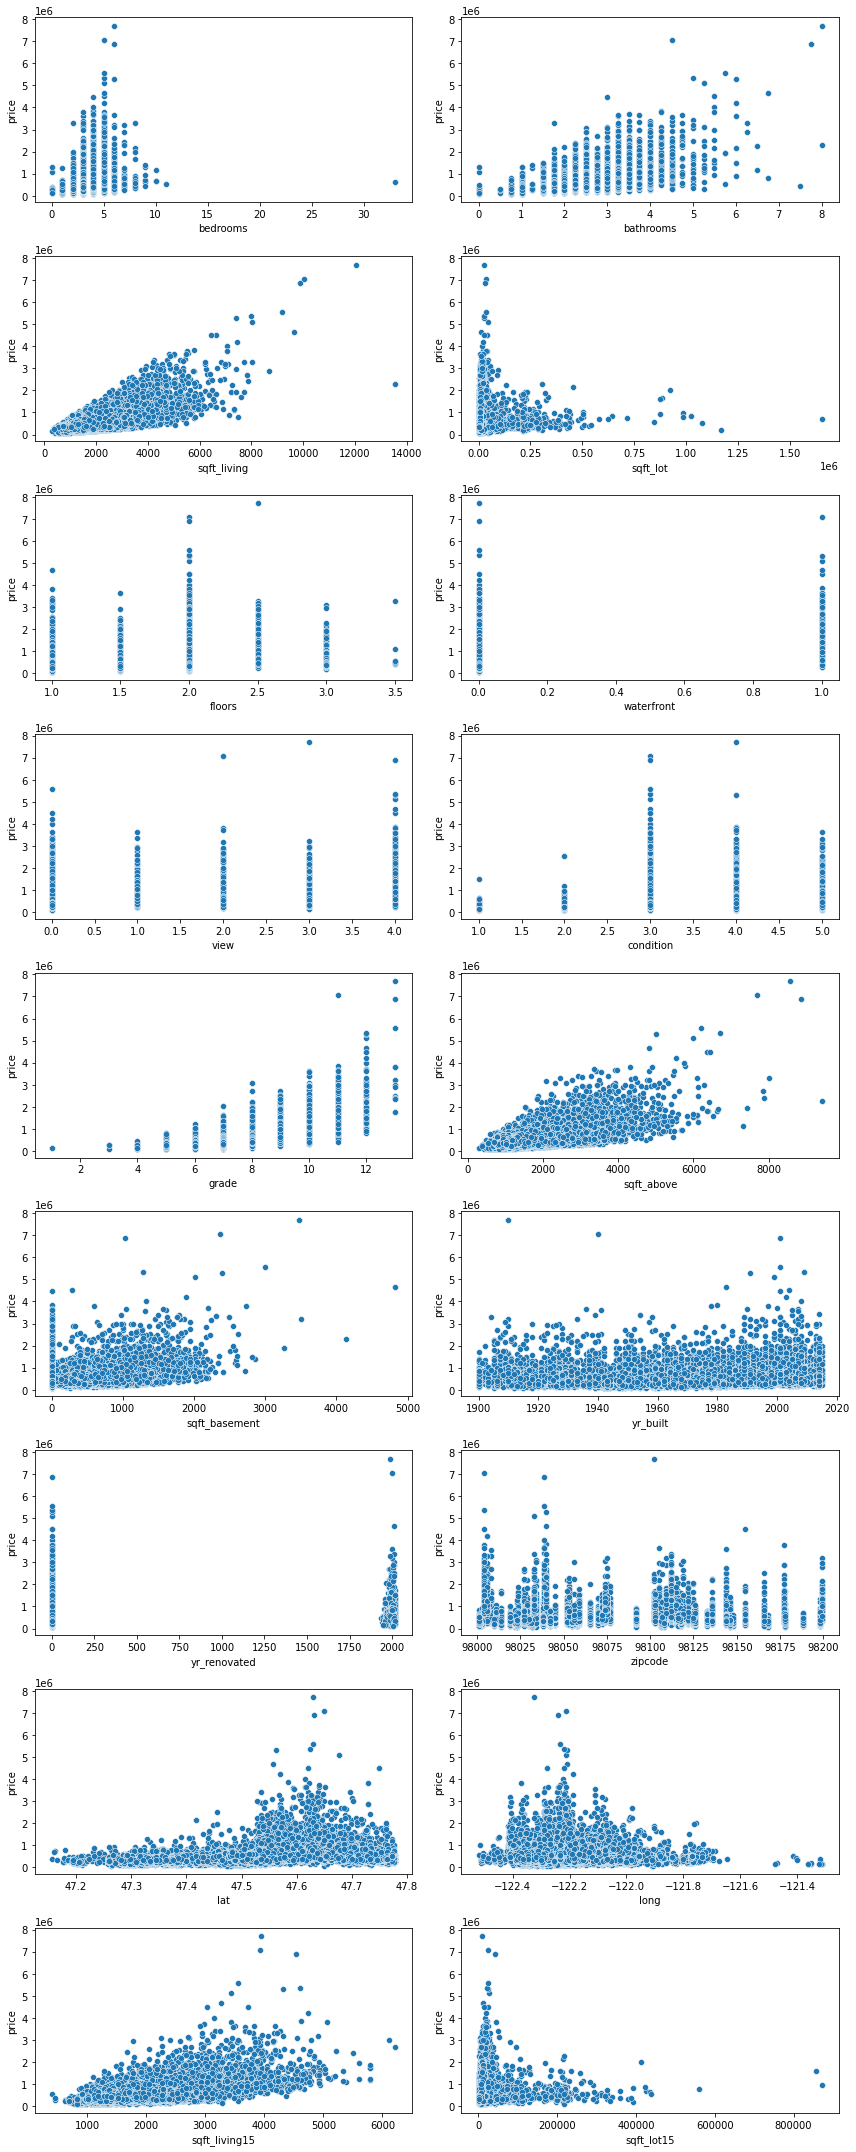

In [13]:
# creating scatterplots to observe the relationship between price and the variables
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house_columns):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

**Observations**

1. We can see a relatively even spread for the below features, indicating a strong linear relationship with price. Meaning an increase in the variable, will increase the price of the house.
*sqft_living parameter, sqrt_above,bathrooms,grade (has outliers)

2. the below features have a weak linear relationship with price
*sqrt_living15, lat, long

3. the below features are categorical and a linear relationship cannot be established 
*floors,waterfront,view,condition,yr_renovated,zip_code

4. the below features are poorly related to price
*sqft_lot , sqft_basement,sqft_lot15
there are a lot of zeros in these variables distribution.


### 3.2 Checking for outliers

In [14]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.400984e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.671646e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


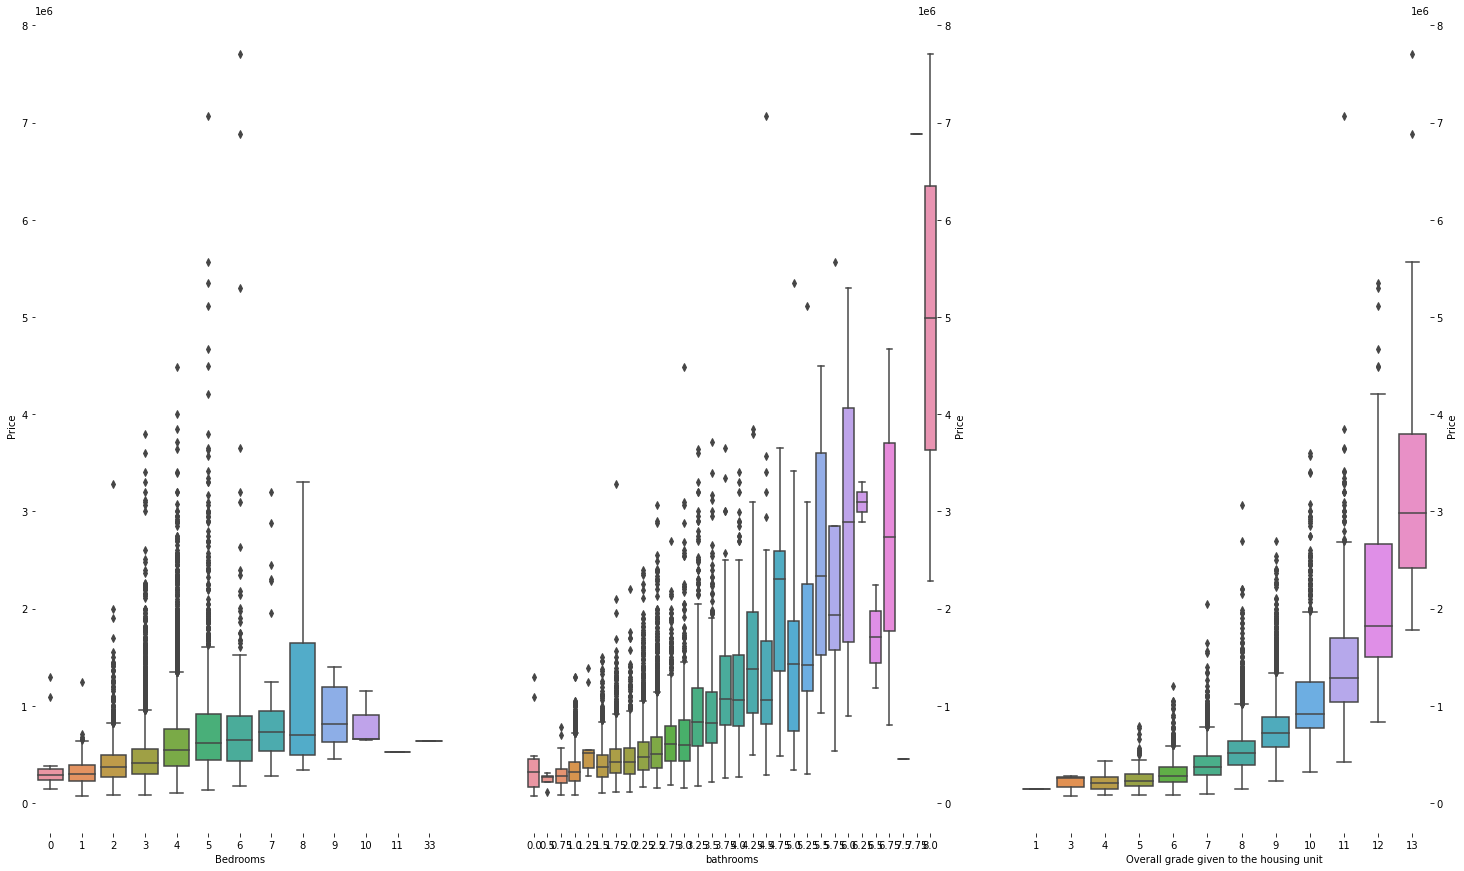

In [26]:
f, axes = plt.subplots(1, 3,figsize = (25,15))
sns.boxplot(x = house['bedrooms'],y = house['price'], ax = axes[0])
sns.boxplot(x = house['bathrooms'],y = house['price'], ax = axes[1])
sns.boxplot(x = house['grade'],y = house['price'], ax = axes[2])
sns.despine(left = True, bottom = True)
axes[0].set(xlabel = 'Bedrooms', ylabel = 'Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel = 'bathrooms', ylabel = 'Price')
axes[2].set(xlabel = 'Overall grade given to the housing unit', ylabel = 'Price')
axes[2].yaxis.set_label_position("right")
axes[2].yaxis.tick_right()

[Text(0.5, 0, 'sqft_lot15')]

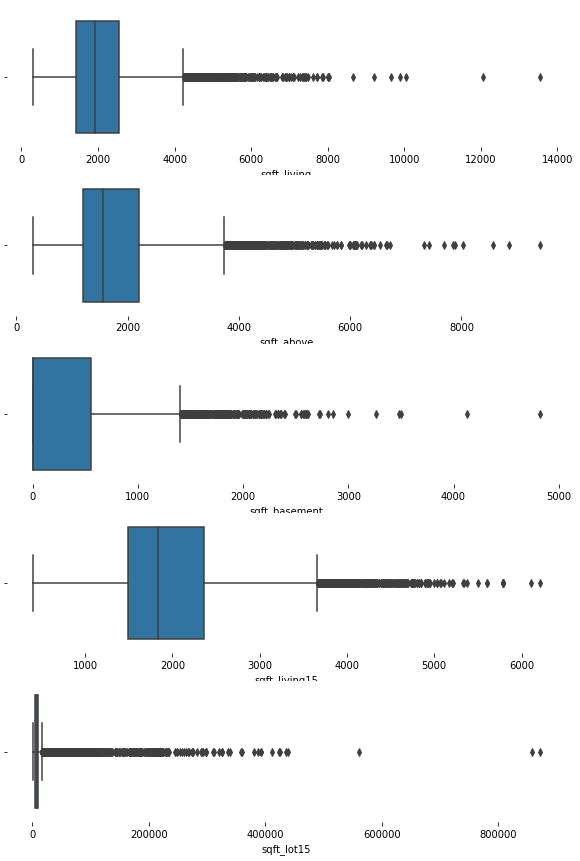

In [38]:
f, axes = plt.subplots(5, 1,figsize = (10,15))
sns.boxplot(x="sqft_living",data=house, ax = axes[0])
sns.boxplot(x="sqft_above",data=house, ax = axes[1])
sns.boxplot(x="sqft_basement",data=house, ax = axes[2])
sns.boxplot(x="sqft_living15",data=house, ax = axes[3])
sns.boxplot(x="sqft_lot15",data=house, ax = axes[4])
sns.despine(left = True, bottom = True)
axes[0].set(xlabel = 'sqft_living')
axes[1].set(xlabel = 'sqft_above')
axes[2].set(xlabel = 'sqft_basement')
axes[3].set(xlabel = 'sqft_living15')
axes[4].set(xlabel = 'sqft_lot15')


[Text(0.5, 0, 'Waterfront'), Text(0, 0.5, 'Price')]

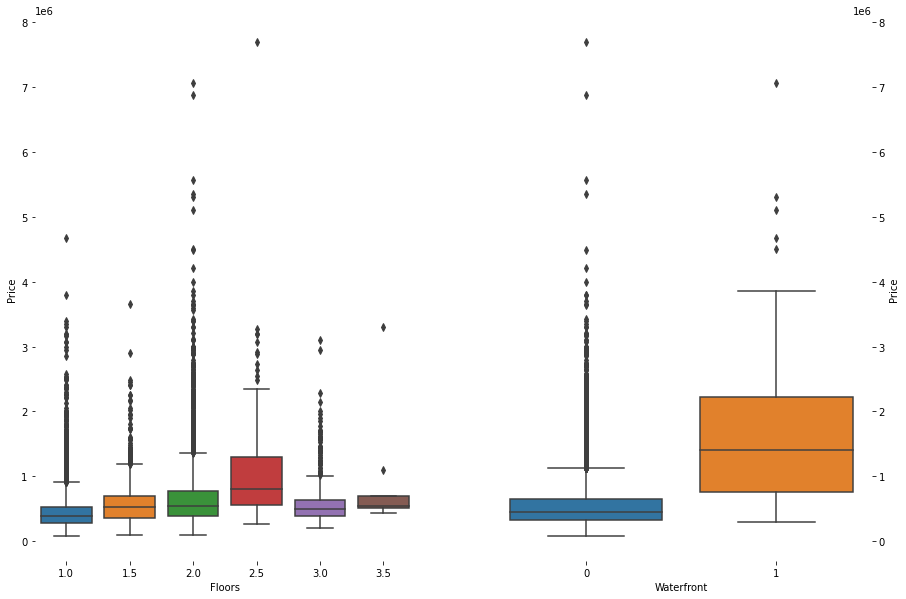

In [17]:
f, axes = plt.subplots(1, 2,figsize = (15,10))
sns.boxplot(x = house['floors'],y = house['price'], ax = axes[0])
sns.boxplot(x = house['waterfront'],y = house['price'], ax = axes[1])
sns.despine(left = True, bottom = True)
axes[0].set(xlabel = 'Floors', ylabel = 'Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel = 'Waterfront', ylabel = 'Price')

[Text(0.5, 0, 'Overall Condition'), Text(0, 0.5, 'Price')]

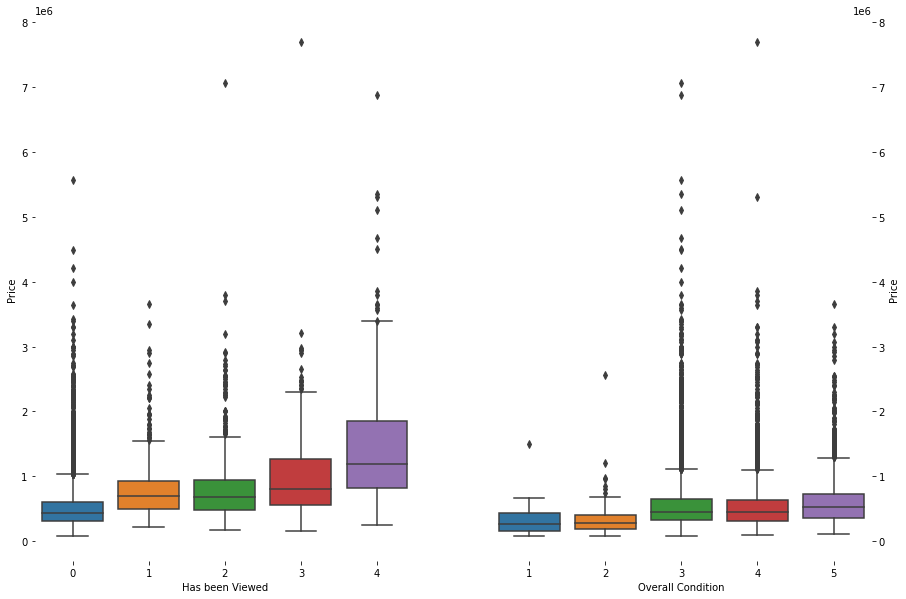

In [21]:
f, axes = plt.subplots(1, 2,figsize = (15,10))
sns.boxplot(x = house['view'],y = house['price'], ax = axes[0])
sns.boxplot(x = house['condition'],y = house['price'], ax = axes[1])
sns.despine(left = True, bottom = True)
axes[0].set(xlabel = 'Has been Viewed', ylabel = 'Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel = 'Overall Condition', ylabel = 'Price')

Observations made: 

1. there are some outliers :

*in the bedroom eg there is 33 bedroomed house 
*in price eg there is a 7.7 million dollar house  
*in the bathroom eg there is an 8 bathroomed house
*in the Overall grade given to the house,eg there is a house graded 13
* in the square footage of the home eg there is house of over 13000ft
*in the square footage above the house9not basement) there is a house of over 9400 ft.
* in the sqaure footage of the basement, ther eis ahouse with over 4800 ft
*in the square footage of the living area, there is a house with over 6200 ft.

Actions to take:

the outliers were not dropped as they were in many of the data features. 
their removal would affect the data and therefore they were maintained.

### 3.3 Checking multicollinearity

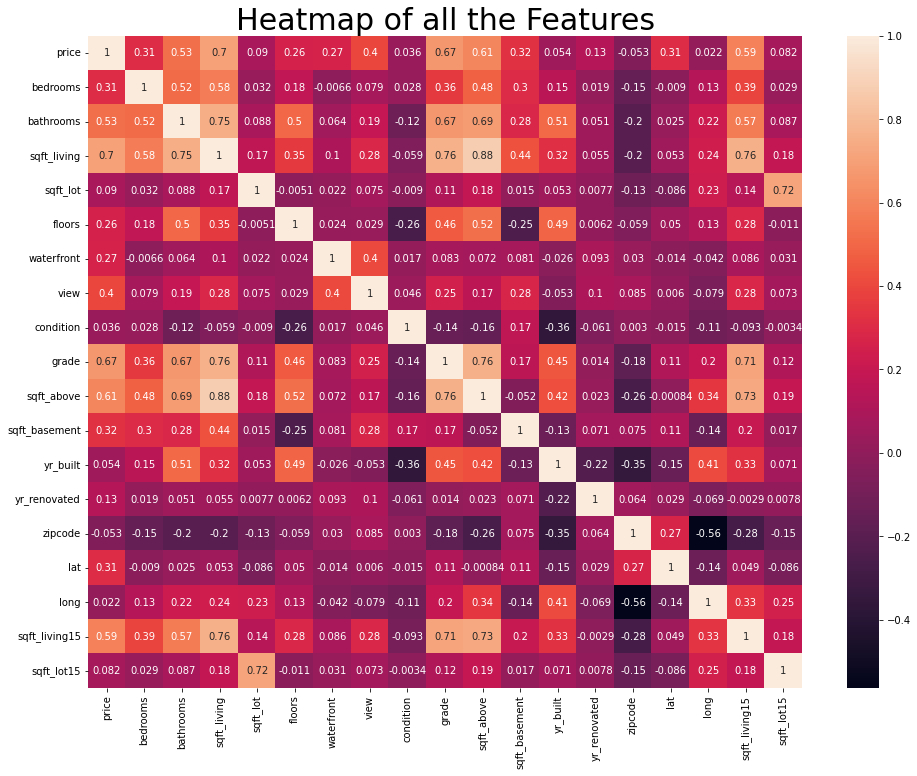

In [43]:
# create a heatmap of the correlations
corrMatrix = house.corr()
corrMatrix

# We define how big we want our visualisation
plt.figure(figsize=(16, 12)) 

# Creating our visualisation
sns.heatmap(corrMatrix, annot = True) 
## Give title to the visualization 
plt.title("Heatmap of all the Features", fontsize = 30);

In [47]:
# check VIF scores
# Remove the price column, since we want to focus on our independent variables only.
features = house.drop(columns=['price'])
# calculating correlations
corr = features.corr()
corr


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197
bathrooms,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192
sqft_living,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258
sqft_lot,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552
floors,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180
waterfront,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698
view,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566
condition,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449
grade,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319
sqft_above,0.477569,0.685376,0.876593,0.183508,0.524117,0.072076,0.167642,-0.158273,0.756090,1.000000,-0.051932,0.424084,0.023217,-0.261132,-0.000837,0.343739,0.731846,0.194035


In [51]:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.624498,-0.437351,-9.335496e-01,0.054157,0.070531,0.058651,0.131069,-0.045727,1.124852e-01,1.148695e-02,0.191769,0.052208,0.072700,0.080572,-0.017768,0.107214,0.078959
bathrooms,-0.437351,3.330299,-1.979956e+00,-0.028274,-0.693590,0.013961,-0.056907,-0.141557,3.869090e-01,-1.632618e-01,-0.985859,-0.266049,0.048312,-0.067025,0.084706,0.020523,0.077067
sqft_living,-0.933912,-1.984879,-1.599633e+13,-0.196760,0.430684,-0.396955,0.310481,-0.538620,1.442258e+13,7.708366e+12,0.346156,-0.166906,-0.246836,-0.155988,0.218943,-1.420070,-0.052799
sqft_lot,0.054157,-0.028274,-1.978459e-01,2.101660,0.041602,0.028145,-0.062032,0.029667,-4.643858e-02,4.512733e-02,0.088697,0.020172,-0.001270,0.048121,-0.127024,0.149552,-1.458152
floors,0.070531,-0.693590,4.296100e-01,0.041602,1.996401,-0.002197,-0.052600,0.086195,-1.000812e+00,3.754611e-01,-0.523853,-0.084752,-0.165180,-0.149852,0.190433,0.211001,0.077530
waterfront,0.058651,0.013961,-3.968283e-01,0.028145,-0.002197,1.203258,-0.490181,-0.012034,2.691111e-01,1.945828e-01,-0.011891,-0.064820,0.021363,0.014586,0.021564,0.067539,-0.019516
view,0.131069,-0.056907,3.103506e-01,-0.062032,-0.052600,-0.490181,1.425264,-0.024082,-3.279855e-01,-4.323747e-01,0.117012,-0.042996,-0.136126,0.100694,0.093290,-0.374792,-0.003573
condition,-0.045727,-0.141557,-5.397574e-01,0.029667,0.086195,-0.012034,-0.024082,1.248591,5.163850e-01,1.548583e-01,0.551289,0.205772,0.162598,0.058449,-0.000623,0.061368,-0.027092
sqft_above,0.111580,0.390497,1.442258e+13,-0.047329,-1.001802,0.269113,-0.327848,0.515421,-1.300365e+13,-6.949999e+12,-0.093537,0.115657,0.186098,0.165813,-0.353400,-0.684532,-0.094269
sqft_basement,0.009314,-0.161071,7.708366e+12,0.044580,0.374827,0.194632,-0.432399,0.154291,-6.949999e+12,-3.714532e+12,-0.012368,0.056208,0.049502,-0.053122,0.098182,0.083453,-0.023891


**Interpreting the VIF table:**

VIF = 1 : Predictors are Not correlated

1 < VIF < 5 : Predictors are Moderately correlated

VIF > 5 to 10 : Predictors are Highly correlated


**Observations:**

1. 14 of the features are moderately correlated. 
Bathrooms and Grade have the highest moderate correlation,Their VIF scores are 3.35 and 3.41 respectively.

2. None of the features are highly correlated as no VIF scores are above 5.



**Actions:**
 Dropping Bathrooms and Grade interchangeably to see how the VIF scores will improve/not improve if these features are removed from our dataset


In [55]:
#dropping bathrooms
revised_features = features.drop(columns=['bathrooms'])
corr = revised_features.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.588500,-1.334993e+00,0.046017,-0.043113,0.064464,0.108598,-0.069518,0.269856,1.559559e-01,1.281041e-02,0.005642,0.009939,0.085918,0.045208,0.024944,0.038033,0.095247
sqft_living,-1.336321,-1.592262e+13,-0.183645,0.166019,-0.414124,0.376269,-0.585150,-1.824380,1.435612e+13,7.672843e+12,0.143748,-0.274499,-0.263651,-0.015248,0.052548,-0.918317,-0.047888
sqft_lot,0.046017,-1.839556e-01,2.102334,0.040372,0.027442,-0.059418,0.029539,-0.055726,-4.280697e-02,3.832557e-02,0.092027,0.019427,-0.002279,0.053037,-0.132828,0.164569,-1.458772
floors,-0.043113,1.664588e-01,0.040372,1.875688,-0.003477,-0.048670,0.062186,-0.283969,-9.123970e-01,3.171228e-01,-0.669552,-0.132447,-0.162350,-0.135860,0.174834,0.290910,0.087090
waterfront,0.064464,-4.141974e-01,0.027442,-0.003477,1.203939,-0.492726,-0.012406,0.050097,2.652384e-01,1.991700e-01,-0.018277,-0.065066,0.022436,0.009936,0.027073,0.054110,-0.018694
view,0.108598,3.765552e-01,-0.059418,-0.048670,-0.492726,1.434784,-0.022863,-0.188800,-3.159688e-01,-4.514838e-01,0.139807,-0.042413,-0.140109,0.118133,0.072637,-0.324155,-0.006572
condition,-0.069518,-5.856622e-01,0.029539,0.062186,-0.012406,-0.022863,1.243836,-0.065472,5.315043e-01,1.404976e-01,0.523131,0.196242,0.162985,0.062044,-0.004687,0.079679,-0.025313
grade,0.269856,-1.824279e+00,-0.055726,-0.283969,0.050097,-0.188800,-0.065472,3.397052,-6.852735e-02,3.065254e-01,-0.713244,-0.092282,0.086517,-0.334376,0.397642,-0.904803,0.077646
sqft_above,0.154584,1.435612e+13,-0.042932,-0.911368,0.265196,-0.315867,0.530917,-0.068103,-1.294373e+13,-6.917972e+12,0.034445,0.147427,0.177928,0.179374,-0.368304,-0.672044,-0.105474
sqft_basement,0.010977,7.672843e+12,0.038166,0.317485,0.199145,-0.451372,0.140247,0.306504,-6.917972e+12,-3.697415e+12,-0.125427,0.034332,0.059232,-0.087069,0.139760,0.001074,-0.013485


**Observations:**

1. Most scores dropped by very small margins, indicating that bathrooms and the other variables are not highly collinear



In [53]:
#dropping grade
revised_features = features.drop(columns=['grade'])
corr = revised_features.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.624498,-0.437351,-9.335496e-01,0.054157,0.070531,0.058651,0.131069,-0.045727,1.124852e-01,1.148695e-02,0.191769,0.052208,0.072700,0.080572,-0.017768,0.107214,0.078959
bathrooms,-0.437351,3.330299,-1.979956e+00,-0.028274,-0.693590,0.013961,-0.056907,-0.141557,3.869090e-01,-1.632618e-01,-0.985859,-0.266049,0.048312,-0.067025,0.084706,0.020523,0.077067
sqft_living,-0.933912,-1.984879,-1.599633e+13,-0.196760,0.430684,-0.396955,0.310481,-0.538620,1.442258e+13,7.708366e+12,0.346156,-0.166906,-0.246836,-0.155988,0.218943,-1.420070,-0.052799
sqft_lot,0.054157,-0.028274,-1.978459e-01,2.101660,0.041602,0.028145,-0.062032,0.029667,-4.643858e-02,4.512733e-02,0.088697,0.020172,-0.001270,0.048121,-0.127024,0.149552,-1.458152
floors,0.070531,-0.693590,4.296100e-01,0.041602,1.996401,-0.002197,-0.052600,0.086195,-1.000812e+00,3.754611e-01,-0.523853,-0.084752,-0.165180,-0.149852,0.190433,0.211001,0.077530
waterfront,0.058651,0.013961,-3.968283e-01,0.028145,-0.002197,1.203258,-0.490181,-0.012034,2.691111e-01,1.945828e-01,-0.011891,-0.064820,0.021363,0.014586,0.021564,0.067539,-0.019516
view,0.131069,-0.056907,3.103506e-01,-0.062032,-0.052600,-0.490181,1.425264,-0.024082,-3.279855e-01,-4.323747e-01,0.117012,-0.042996,-0.136126,0.100694,0.093290,-0.374792,-0.003573
condition,-0.045727,-0.141557,-5.397574e-01,0.029667,0.086195,-0.012034,-0.024082,1.248591,5.163850e-01,1.548583e-01,0.551289,0.205772,0.162598,0.058449,-0.000623,0.061368,-0.027092
sqft_above,0.111580,0.390497,1.442258e+13,-0.047329,-1.001802,0.269113,-0.327848,0.515421,-1.300365e+13,-6.949999e+12,-0.093537,0.115657,0.186098,0.165813,-0.353400,-0.684532,-0.094269
sqft_basement,0.009314,-0.161071,7.708366e+12,0.044580,0.374827,0.194632,-0.432399,0.154291,-6.949999e+12,-3.714532e+12,-0.012368,0.056208,0.049502,-0.053122,0.098182,0.083453,-0.023891


**Observations:**
1. Most scores dropped by very small margins, indicating that grade and the other variables are not highly collinear


In [54]:
#dropping grade and bathrooms
revised_features = features.drop(columns=['bathrooms','grade'])
corr = revised_features.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.567063,-1.194356e+00,0.050444,-0.020555,0.060484,0.123596,-0.064317,1.595628e-01,-1.339237e-02,0.062301,0.017269,0.079045,0.071770,-0.006644,0.109909,0.089079
sqft_living,-1.191445,-1.592262e+13,-0.213433,0.012458,-0.387364,0.275405,-0.620351,1.435612e+13,7.672843e+12,-0.239067,-0.324048,-0.218399,-0.194327,0.264831,-1.406974,-0.006393
sqft_lot,0.050444,-2.140528e-01,2.101420,0.035713,0.028264,-0.062515,0.028465,-4.360129e-02,4.337225e-02,0.080327,0.017913,-0.000860,0.047552,-0.126305,0.149727,-1.457498
floors,-0.020555,1.431187e-02,0.035713,1.851950,0.000710,-0.064452,0.056713,-9.178659e-01,3.424516e-01,-0.729174,-0.140161,-0.155118,-0.163811,0.208074,0.215275,0.093580
waterfront,0.060484,-3.872874e-01,0.028264,0.000710,1.203200,-0.489942,-0.011441,2.662811e-01,1.945972e-01,-0.007759,-0.063705,0.021160,0.014867,0.021209,0.067453,-0.019839
view,0.123596,2.751613e-01,-0.062515,-0.064452,-0.489942,1.424291,-0.026501,-3.201169e-01,-4.343052e-01,0.100166,-0.047542,-0.135301,0.099549,0.094737,-0.374442,-0.002256
condition,-0.064317,-6.207328e-01,0.028465,0.056713,-0.011441,-0.026501,1.242574,5.301362e-01,1.464761e-01,0.509384,0.194463,0.164652,0.055600,0.002977,0.062241,-0.023816
sqft_above,0.160038,1.435612e+13,-0.044174,-0.916109,0.266331,-0.320130,0.529641,-1.294373e+13,-6.917972e+12,0.019938,0.145568,0.180755,0.172222,-0.359188,-0.687718,-0.103732
sqft_basement,-0.013348,7.672843e+12,0.043127,0.343615,0.194695,-0.434592,0.146174,-6.917972e+12,-3.697415e+12,-0.061184,0.042654,0.052010,-0.057139,0.104494,0.084029,-0.020392
yr_built,0.062301,-2.421559e-01,0.080327,-0.729174,-0.007759,0.100166,0.509384,2.272217e-02,-5.969615e-02,2.018887,0.441590,0.286611,0.228672,-0.406995,-0.086721,0.002523


**Observations:**

1. Most scores dropped by very small margins, indicating that both grade and bathrooms and the other variables are not highly collinear


**Conclusions**

We maintain the features as they are. none of the features will be dropped in the model.

## <font color='#2F4F4F'>4. Data Modeling</font>

In [61]:
# split into features (X) and label (Y)
X = features
y = house['price'].values



In [62]:
# split into 80-20 train and test sets
X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [63]:
# fit regressor to data and make predictions
regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for house price based on our model
price_predict = regressor.predict(X_test)



In [69]:
# evaluate RMSE and r-squared scores

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(price_test, price_predict)))


Root Mean Squared Error: 194615.27495422406


In [74]:
print("R-Squared Score: %.2f" % r2_score(price_test, price_predict))


R-Squared Score: 0.69


**Conclusions**

R-Squared is also known as the coefficient of determination, R-squared score measures the goodness of fit of a regression model.


A score of 1 indicates a perfect prediction by the model therefore the R-Squared score of 0.69 shows that this model is a relatively good fit.

### 4.1 Test for normality and homoscedasticity

In [75]:
# create a dataframe of residuals
X = features
y = house['price'].values

# split into 80-20 train and test sets
X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit regressor to data and make predictions
regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for house price based on our model
price_predict = regressor.predict(X_test)

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()


3969.6191903356644

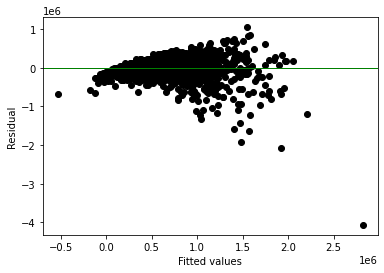

In [76]:
# # plotting our residuals
plt.scatter(price_predict, residuals, color='black')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='green', linewidth=1)
plt.show()

**Interpretation of the residual plot**

1. The residuals are randomly scattered around zero for the entire range of fitted values, that is, the residual plot has no visible pattern.

This means that the models predictions are correct on average, rather than systematically too high or low.

2. Since the degree of scattering is the same for all the fitted values, then this regression also assumes that the residuals follow a normal distribution

3. Also, since we have no visible patterns on the residual plot, it means we cannot improve the fit of the model by moving the models predictability over to the independent variables.

In [79]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# computing the critical value of a chi-squared distribution
degree_of_freedom = len(price_predict) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

Critical value: inf
the variances are homogeneous!


We cannot identify any patterns, and therefore we accept the null hypothesis that 
the variance is homogeneous across our data

### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [81]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, price_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(price_test, ada_predict)))
    print()
    
print("***************************************************") 



# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, price_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(price_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, price_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(price_test, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 202440.9424180919

Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 222141.54239257495

Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 227746.7466572356

Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 237770.6405667392

Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 250629.88383088305

Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 266721.36738110107

Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 290128.0715574675

Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 289968.4479334681

Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 288069.97760697996

***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 125192.43156254945

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 121117.05072812104

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Score

In [83]:
print("Ada Boosting R-squared Score:", metrics.r2_score(price_test, ada_predict))
print("Gradient Boosting R-squared Score:", metrics.r2_score(price_test, gradient_predict))
print("XG Boosting R-squared Score:", metrics.r2_score(price_test, xgbr_predict))

Ada Boosting R-squared Score: 0.3169191609927319
Gradient Boosting R-squared Score: 0.8482131834922497
XG Boosting R-squared Score: 0.8486817105103923


From the above analysis, we see that XG Boosting with a learning rate of 0.6 returned the lowest RMSE score (117279). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.